In [4]:
%matplotlib inline
import parameters
import HULib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import glue
parameters.saveme=True
parameters.plotme=True
parameters.glueme = True  # load data to glue for manipulation of the Universe

0 DEC galaxy_DR12v5_LOWZ_North.fits galaxy_DR12v5_CMASS_North.fits
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
1 DEC galaxy_DR12v5_LOWZ_South.fits galaxy_DR12v5_CMASS_South.fits
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
2 RA galaxy_DR12v5_LOWZ_North.fits galaxy_DR12v5_CMASS_North.fits
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', '

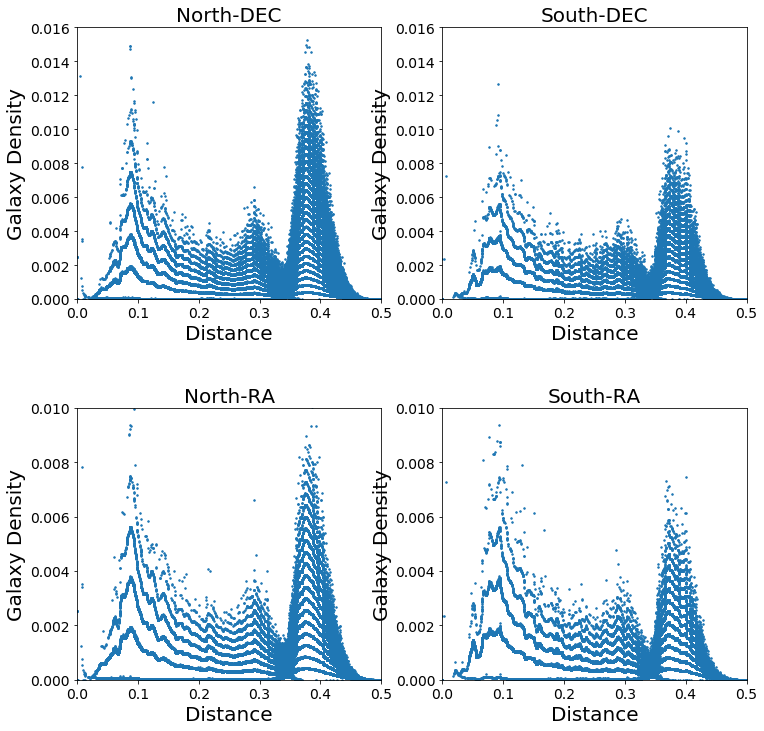

In [5]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=.4)


rangesx= [(0,0.5),(0.0,0.5),(0,0.5),(0.0,0.5)]
rangesy= [(0,0.016),(0.0,0.016),(0,0.010),(0.0,0.010)]
position = [(0,0),(0,1),(1,0),(1,1)]
titleCode=['North-DEC','South-DEC','North-RA','South-RA',]

for i in range(4):
    key = myKeys[i][0]
    val1 = myKeys[i][1]
    val2 = myKeys[i+4][1]
    print(i,key,val1,val2)
    myGalaxy = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + val1),
                         HULib.get_BOSS_data(parameters.sdssAddress + val2)])
    myGalaxy = HULib.fix_BOSS_data(myGalaxy)
    df0=pd.DataFrame({'Me' : myGalaxy.groupby( ['alpha', key])['Me'].sum()}).reset_index()
    df0["alpha"]=4.0/np.pi*df0.alpha
    df0.plot(ax=axes[position[i]], x='alpha', y='Me',style='.',xlim=rangesx[i], 
             fontsize=14, ylim=rangesy[i],legend=False,markersize=3)
    axes[position[i]].set_title(titleCode[i], fontsize=20 )
    axes[position[i]].set_ylabel("Galaxy Density", fontsize=20)
    axes[position[i]].set_xlabel("Distance", fontsize=20)
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsGlobal.png', dpi=300)
    
plt.show()

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')


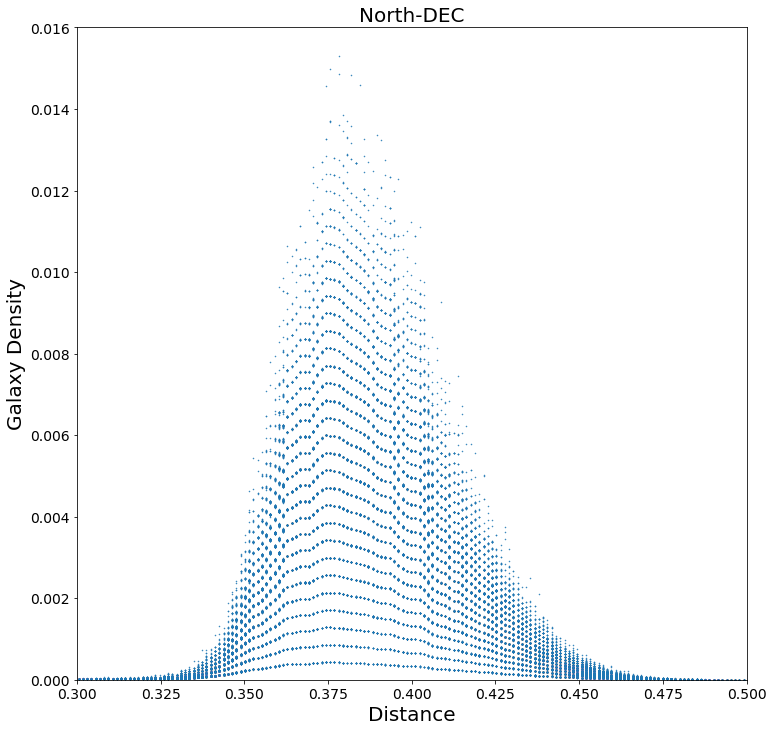

In [6]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

rangesx= (0.3,0.5)
rangesy= (0,0.016)
titleCode=['North-DEC']

myGalaxy = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits')
myGalaxy = HULib.fix_BOSS_data(myGalaxy)
df0=pd.DataFrame({'Me' : myGalaxy.groupby( ['alpha', 'DEC'])['Me'].sum()}).reset_index()
df0["alpha"]=4.0/np.pi*df0.alpha
axes=df0.plot( x='alpha', y='Me',style='.',xlim=rangesx, 
         fontsize=14, ylim=rangesy,legend=False,markersize=1,figsize=(12, 12))
axes.set_title('North-DEC', fontsize=20 )
axes.set_ylabel("Galaxy Density", fontsize=20)
axes.set_xlabel("Distance", fontsize=20)
fig = plt.gcf()
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsNorthMASS.png', dpi=300)
    
plt.show()

# Universe Cross-Section Calculation

In [7]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),
                           HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'DEC'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')


In [5]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[1]),HULib.get_BOSS_data(parameters.sdssAddress + gals[3])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'DEC'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')


In [6]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'RA'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')


In [7]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[1]),HULib.get_BOSS_data(parameters.sdssAddress + gals[3])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'RA'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
